In [2]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import *
from py_common.bounds_dependence import *
from py_common.wave_function import *

BINS = [-0.246, -1.660, -5.280]

reference_singlet = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")
reference_singlet_scaled_1 = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet_scaled_1.dat")

reference_triplet = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")
reference_triplet_scaled_1 = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet_scaled_1.dat")


In [3]:
def bounds_loss(bounds, bounds_true):
    chi = 0
    for i, b in enumerate(bounds_true):
        if i >= len(bounds):
            chi += 1
        else:
            chi += (np.log2(bounds[i] / b))**2
    chi /= i # type: ignore
    
    return chi

def bounds_losses(bounds, bounds_true):
    fields = np.unique(bounds.data[:, 0])

    losses = []
    for bounds_single in bounds.fields():
        losses.append(bounds_loss(bounds_single[:, 1], bounds_true))

    return np.array([np.array(fields), np.array(losses)])

# N_max = 175, potential scaling

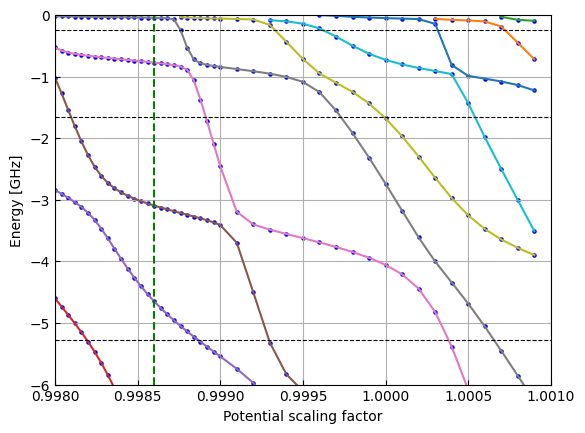

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_triplet_n_max_175_zoom.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.scatter(state[:, 0], state[:, 1], color="blue", s=5)
	ax.plot(state[:, 0], state[:, 1])

for value in BINS:
	ax.axhline(value, linestyle="--", color="black", linewidth=0.8)
	
ax.axvline(0.9986, linestyle="--", color="green")

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-6, 0)
ax.set_xlim(0.998, 1.001);

# fig.savefig(f"{SAVE_PATH}/bound_triplet_n_175_scaling.pdf", bbox_inches = "tight")

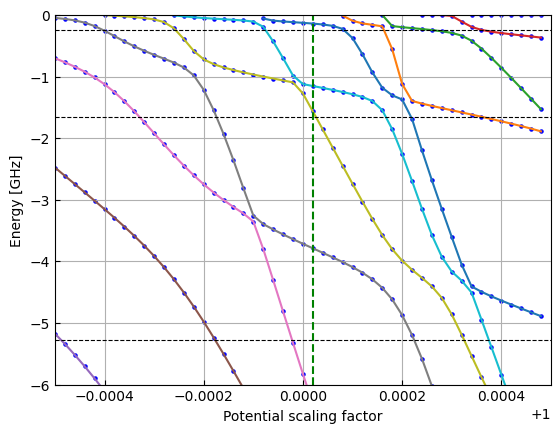

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_singlet_n_max_175_zoom.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.scatter(state[:, 0], state[:, 1], color="blue", s=5)
	ax.plot(state[:, 0], state[:, 1])

for value in BINS:
	ax.axhline(value, linestyle="--", color="black", linewidth=0.8)

ax.axvline(1.00002, linestyle="--", color="green")

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-6, 0);
ax.set_xlim(0.9995, 1.0005);

# fig.savefig(f"{SAVE_PATH}/bound_singlet_n_175_scaling.pdf", bbox_inches = "tight")

In [6]:
max_coeff = 5
parsed_singlet = parse_wavefunction_file(f'{DATA_PATH}/wave_function_singlet_175.output', 176, max_coeff = max_coeff)
parsed_singlet_scaled = parse_wavefunction_file(f'{DATA_PATH}/wave_function_singlet_175_scaled.output', 176, max_coeff = max_coeff)
parsed_triplet = parse_wavefunction_file(f'{DATA_PATH}/wave_function_triplet_175.output', 176, max_coeff = max_coeff)
parsed_triplet_scaled = parse_wavefunction_file(f'{DATA_PATH}/wave_function_triplet_175_scaled.output', 176, max_coeff = max_coeff)

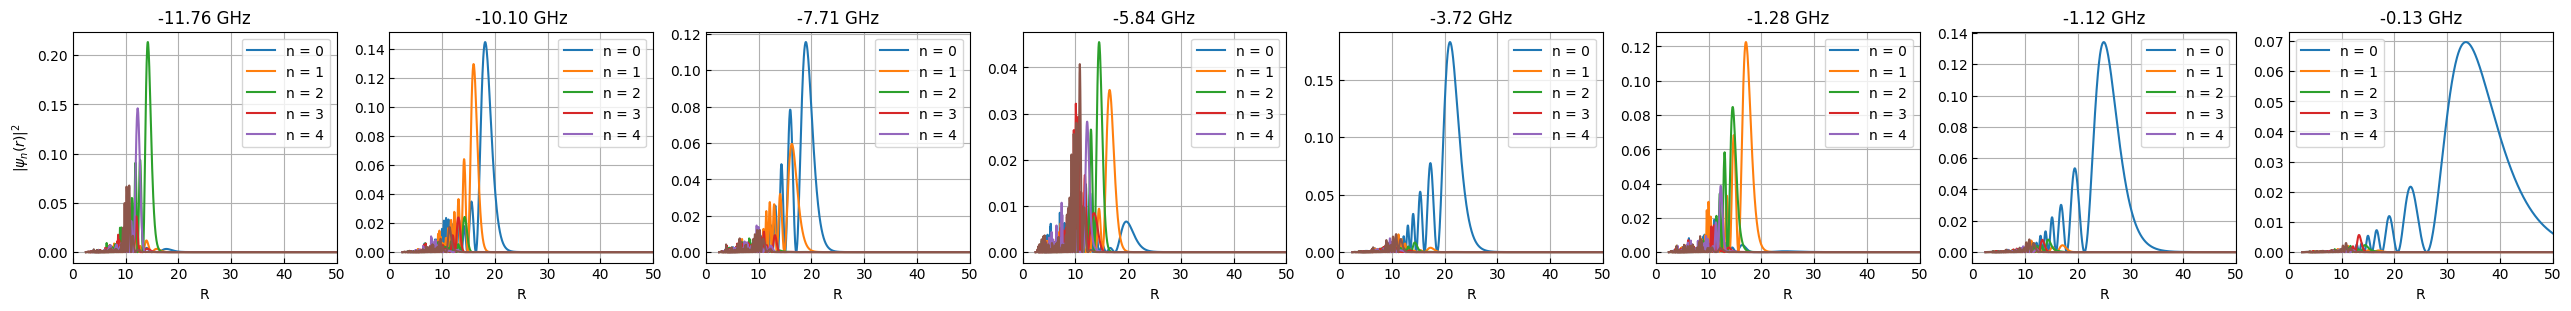

In [ ]:
fig, axes = utility.plot_many(1, len(parsed_singlet), shape = (4 * len(parsed_singlet), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in enumerate(parsed_singlet.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"] **2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(max_coeff)])

# fig.savefig(f"{SAVE_PATH}/wave_function_singlet_n_175.pdf", bbox_inches = "tight")

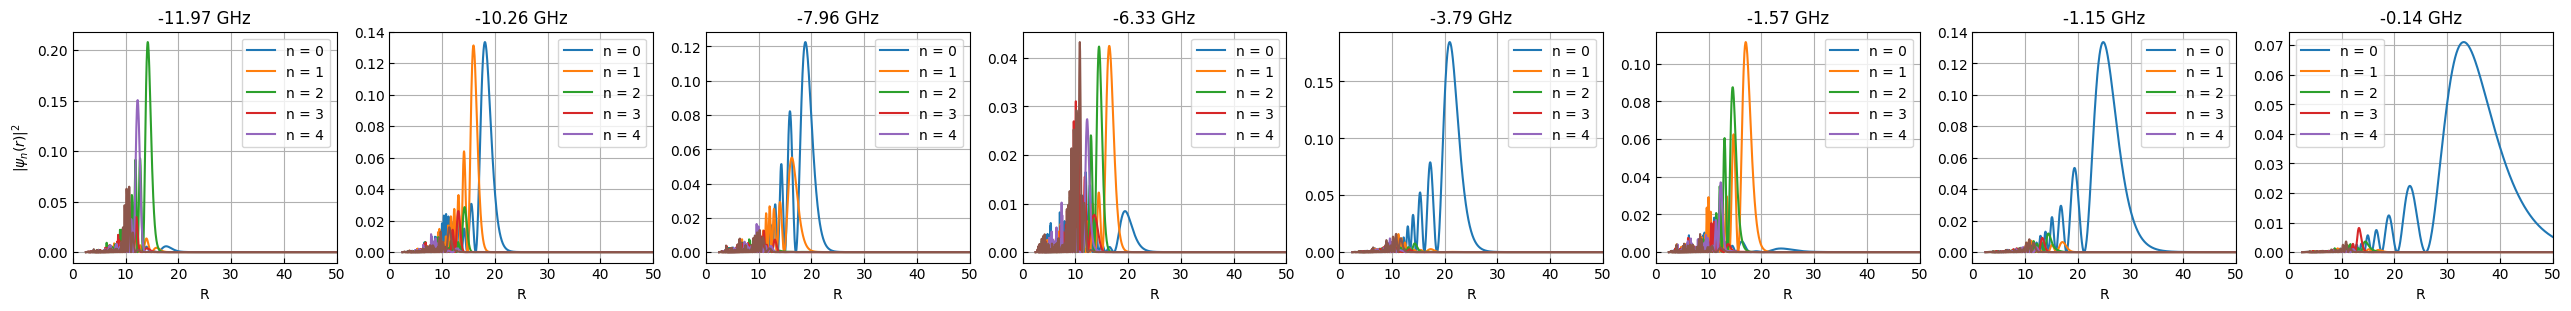

In [ ]:
fig, axes = utility.plot_many(1, len(parsed_singlet_scaled), shape = (4 * len(parsed_singlet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in enumerate(parsed_singlet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(max_coeff)])
    
# fig.savefig(f"{SAVE_PATH}/wave_function_singlet_n_175_scaled.pdf", bbox_inches = "tight")

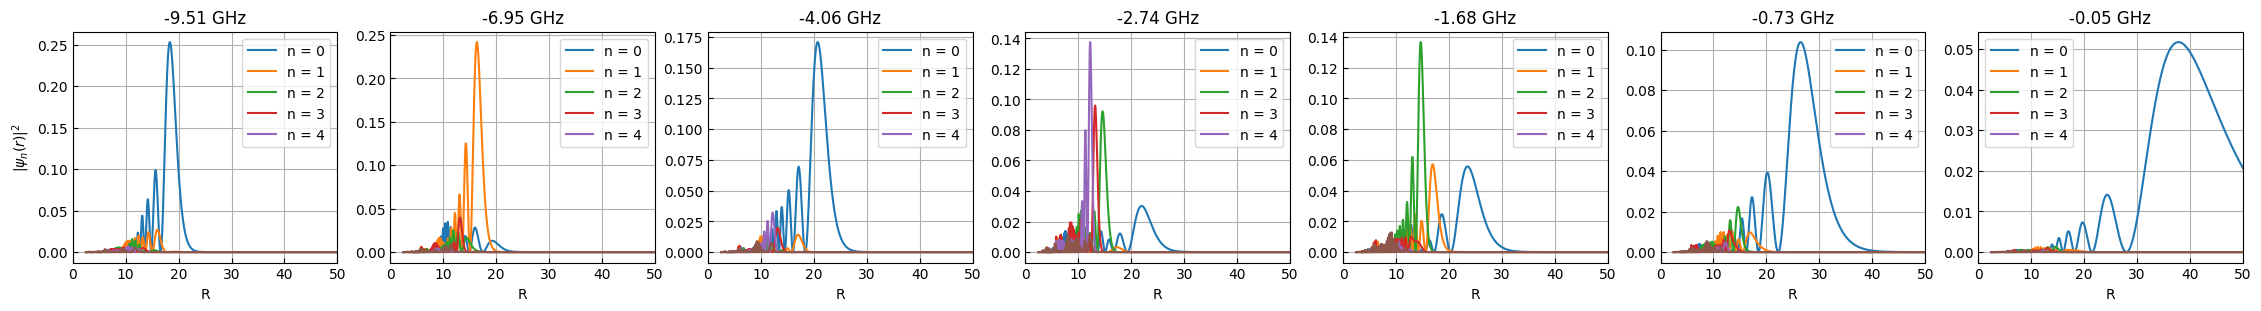

In [ ]:
fig, axes = utility.plot_many(1, len(parsed_triplet), shape = (4 * len(parsed_triplet), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in enumerate(parsed_triplet.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(max_coeff)])
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_175.pdf", bbox_inches = "tight")

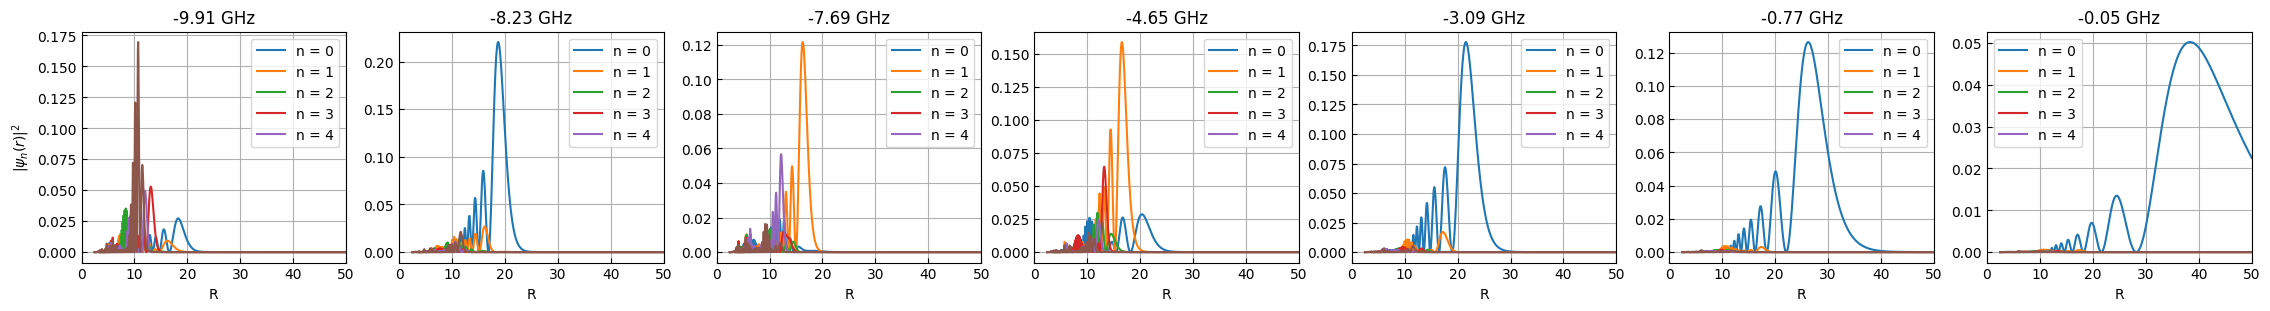

In [ ]:
fig, axes = utility.plot_many(1, len(parsed_triplet_scaled), shape = (4 * len(parsed_triplet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in enumerate(parsed_triplet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(max_coeff)])
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_175_scaled.pdf", bbox_inches = "tight")

# Bound states hifi

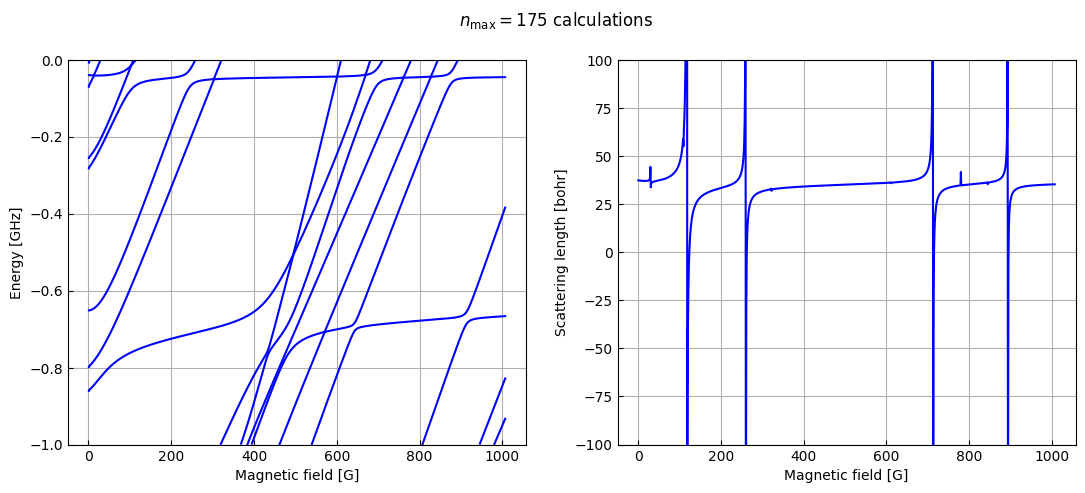

In [ ]:
fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds_single = BoundsDependence(f"{DATA_PATH}/bound_n_max_175.dat")
for state in bounds_single.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

filename = f"{DATA_PATH}/molscat_n_max_175.dat"
data = np.loadtxt(filename, delimiter="\t", skiprows=1)

axes[1].plot(data[:, 1], data[:, 2], color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_175.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 175$ calculations");

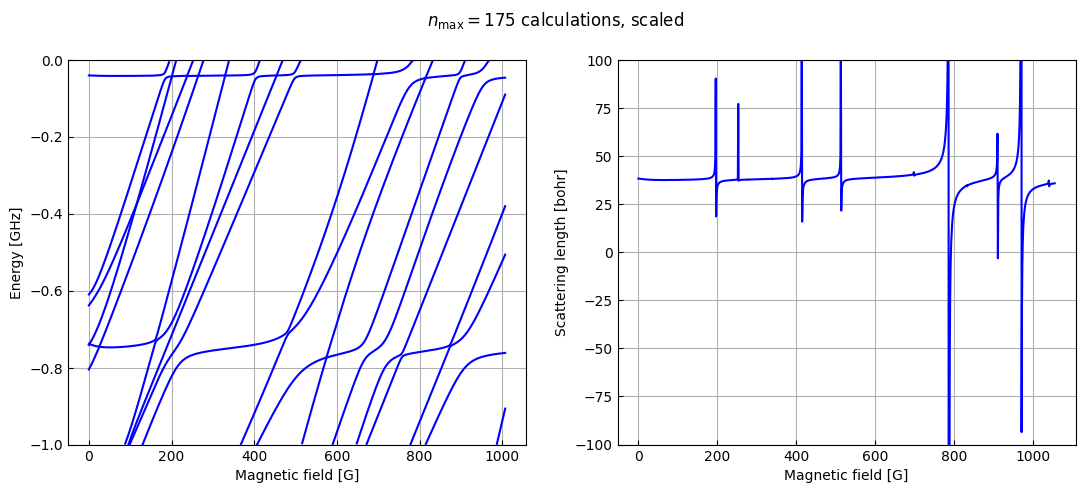

In [ ]:
fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds_single = BoundsDependence(f"{DATA_PATH}/bound_n_max_175_scaled_1.dat")
for state in bounds_single.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

filename = f"{DATA_PATH}/molscat_n_max_175_scaled_1.dat"
data = np.loadtxt(filename, delimiter="\t", skiprows=1)

axes[1].plot(data[:, 1], data[:, 2], color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_175_scaled.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 175$ calculations, scaled");

# N_max = 1, potential scaling

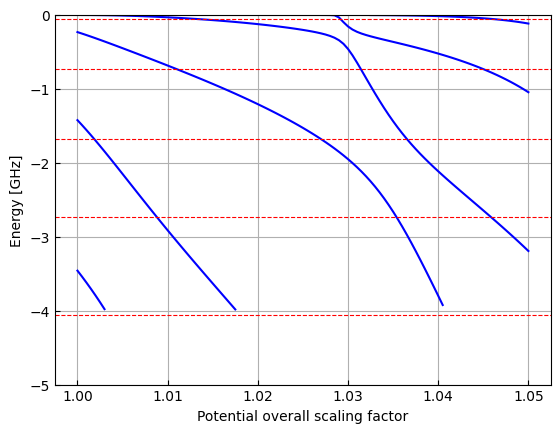

In [4]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_1_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_triplet.pdf")

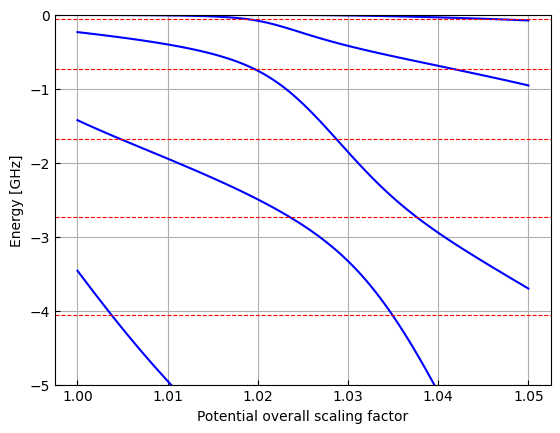

In [5]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_1_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_triplet.pdf")

# N_max = 5, potential scaling

Triplet

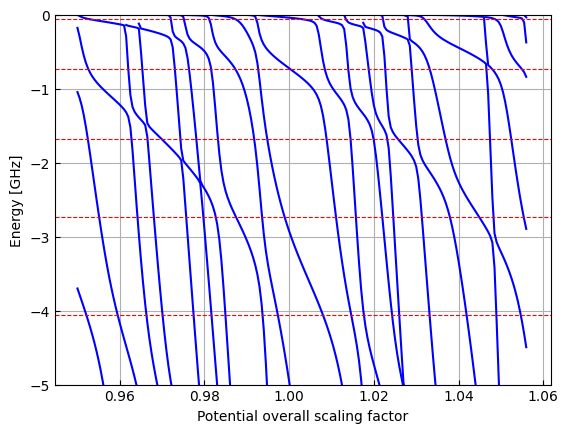

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_triplet.pdf")

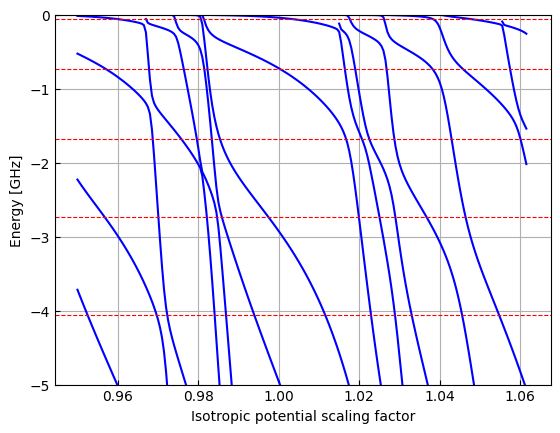

In [27]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_5_triplet.pdf")

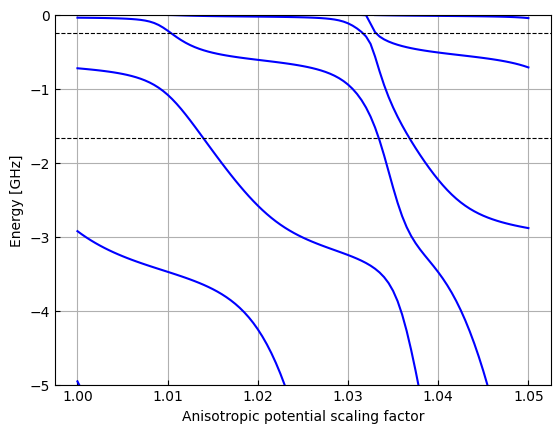

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_aniso_scaling_triplet_n_5.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Anisotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_aniso_scaling_n_5_triplet.pdf")

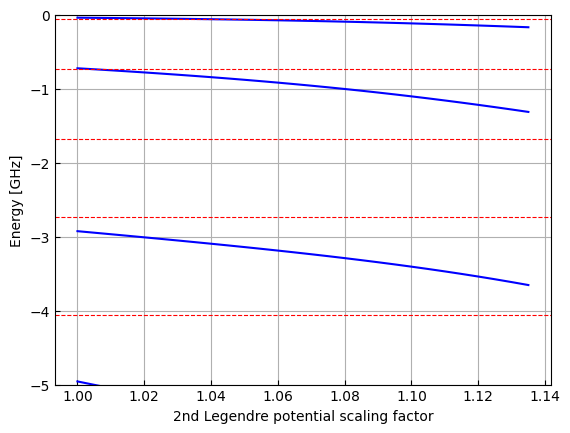

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_lambda_2_scaling_n_5_triplet_extended.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("2nd Legendre potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_lambda_2_scaling_n_5_triplet.pdf")

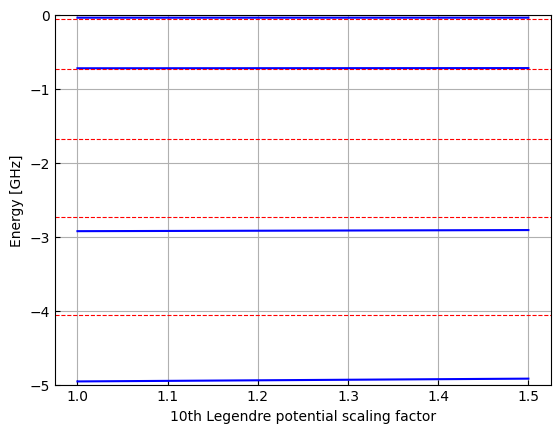

In [55]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_lambda_10_scaling_n_5_triplet_extended.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("10th Legendre potential scaling factor")
ax.set_ylim(-5, 0);
fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_lambda_10_scaling_n_5_triplet.pdf")

Singlet

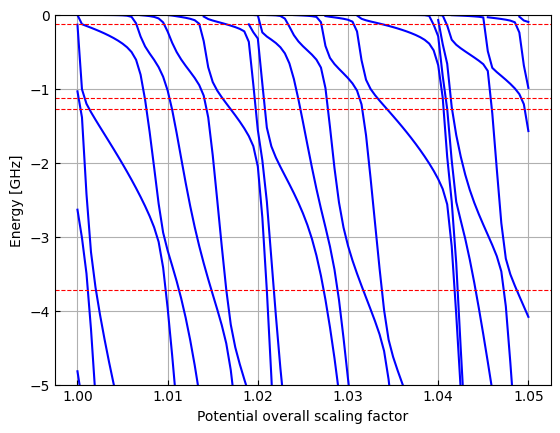

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_singlet.pdf")

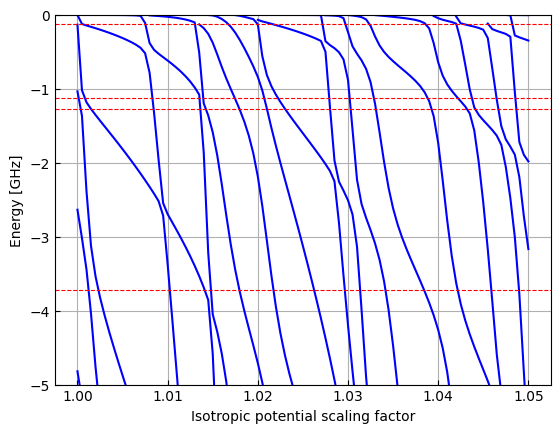

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_5_singlet.pdf")

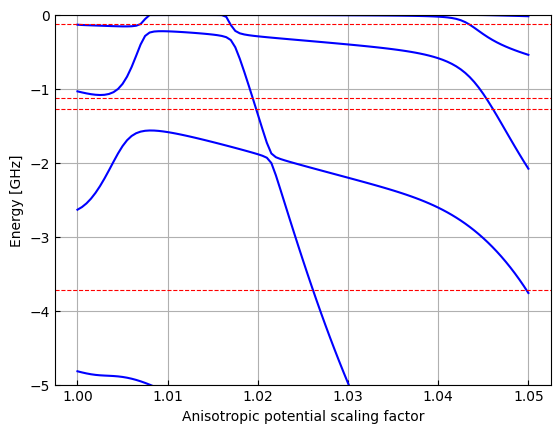

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_aniso_scaling_singlet_n_5.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Anisotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_aniso_scaling_n_5_singlet.pdf")

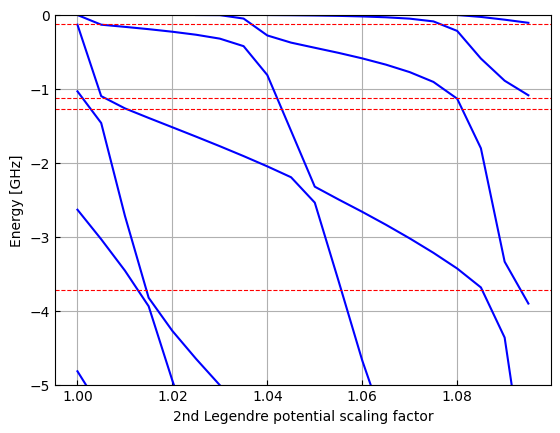

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_lambda_2_scaling_n_5_singlet_extended.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("2nd Legendre potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_lambda_2_scaling_n_5_singlet.pdf")

# N_max = 10, potential scaling

Triplet

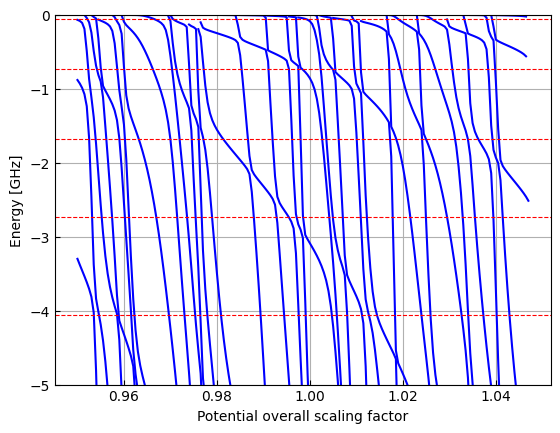

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_10_triplet.pdf")

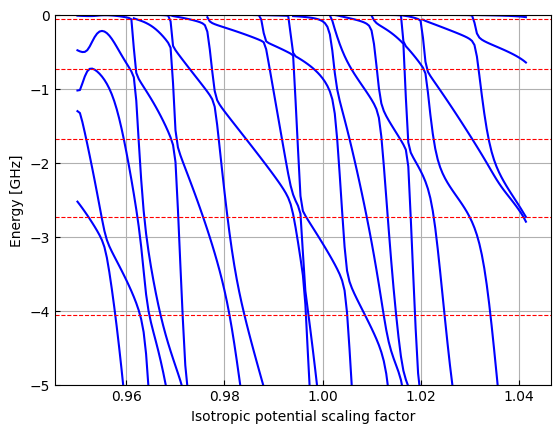

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_10_triplet.pdf")

Singlet

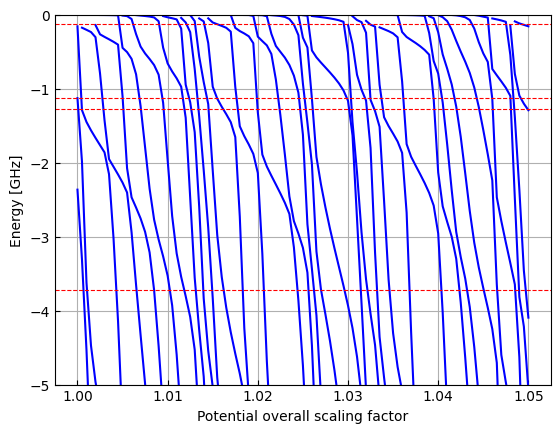

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_10_singlet.pdf")

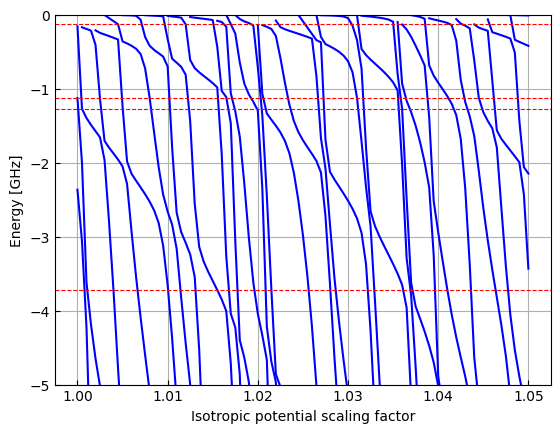

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_10_singlet.pdf")

# Chi^2

Triplet

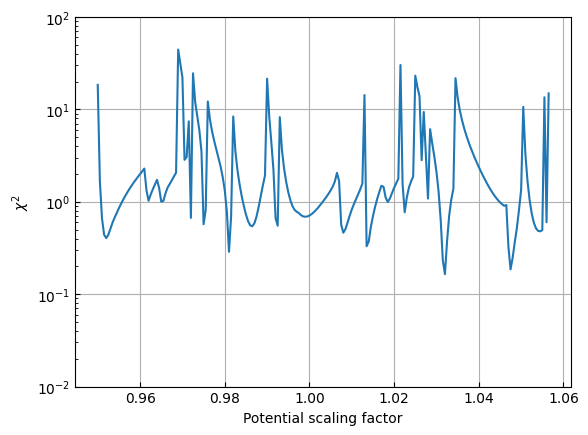

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_5_triplet.pdf")

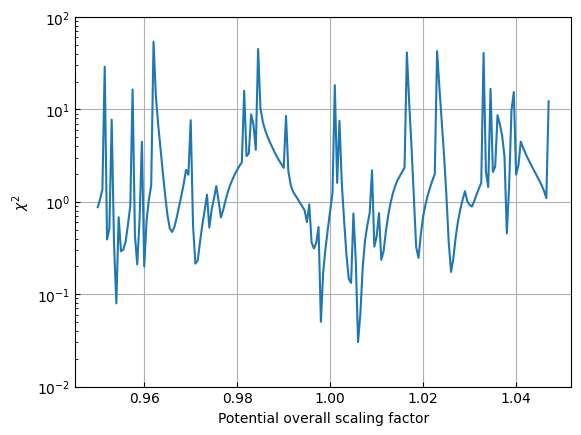

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential overall scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_10_triplet.pdf")

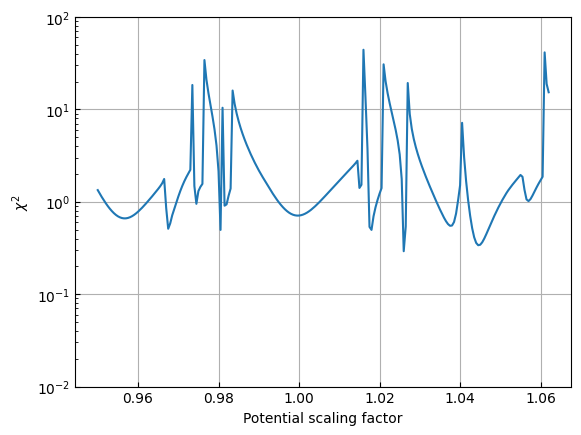

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_5_triplet.pdf")

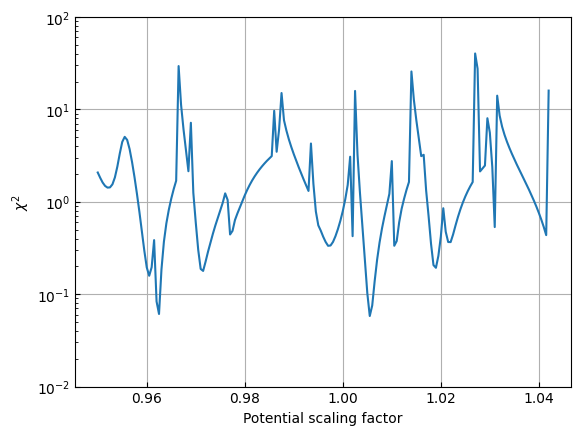

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_10_triplet.pdf")

Singlet

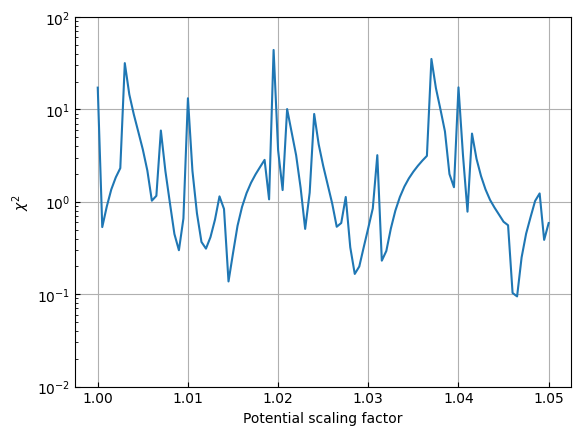

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_5_singlet.pdf")

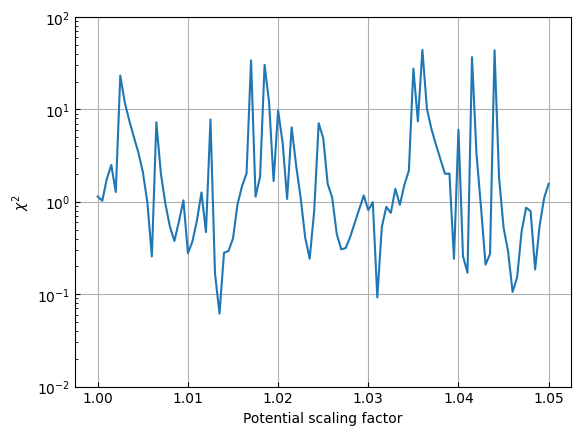

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_10_singlet.pdf")

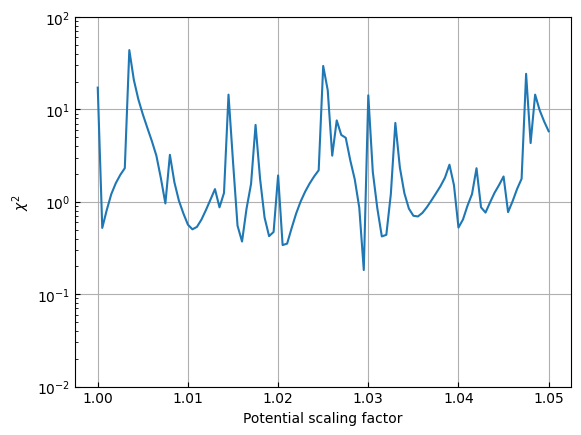

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_5_singlet.pdf")

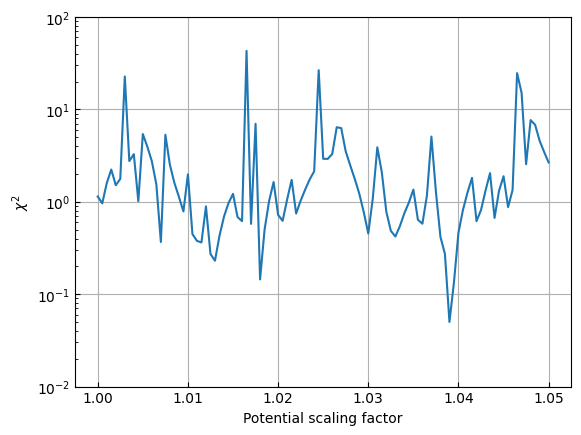

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_10_singlet.pdf")

# Bound in rust

## Triplet

### N_max = 10, potential scaling

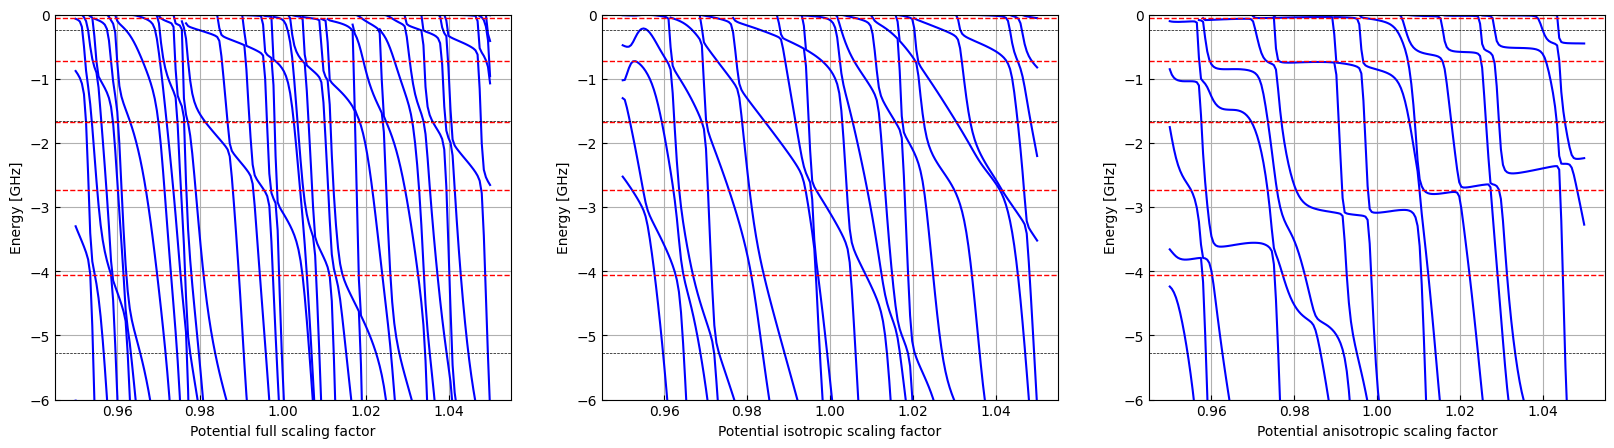

In [27]:
bounds = [
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_full_n_max_10.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_isotropic_n_max_10.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_anisotropic_n_max_10.json"),
]

labels = [
    "Potential full scaling factor",
    "Potential isotropic scaling factor",
    "Potential anisotropic scaling factor",
]

reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, axes = utility.plot_many(1, 3, shape = (20, 5))
for i, ax in enumerate(axes):
    for state in bounds[i].states():
        ax.plot(state[:, 0], state[:, 1], color="blue")
    
    for b in reference:
        ax.axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

    ax.set_ylabel(f"Energy [GHz]")
    ax.set_xlabel(labels[i])
    ax.set_ylim(-6, 0);

### N_max = 2, potential scaling

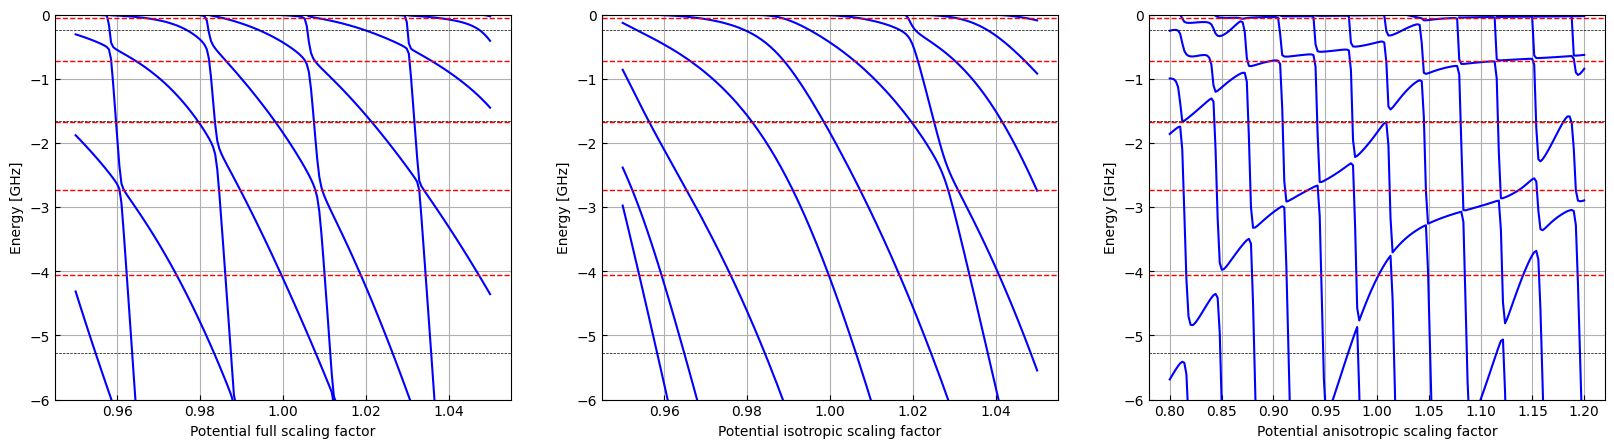

In [13]:
bounds = [
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_full_n_max_2.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_isotropic_n_max_2.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_anisotropic_n_max_2.json"),
]

labels = [
    "Potential full scaling factor",
    "Potential isotropic scaling factor",
    "Potential anisotropic scaling factor",
]

reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, axes = utility.plot_many(1, 3, shape = (20, 5))
for i, ax in enumerate(axes):
    for state in bounds[i].states():
        ax.plot(state[:, 0], state[:, 1], color="blue")
    
    for b in reference:
        ax.axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

    ax.set_ylabel(f"Energy [GHz]")
    ax.set_xlabel(labels[i])
    ax.set_ylim(-6, 0);

### N_max = 1, potential scaling

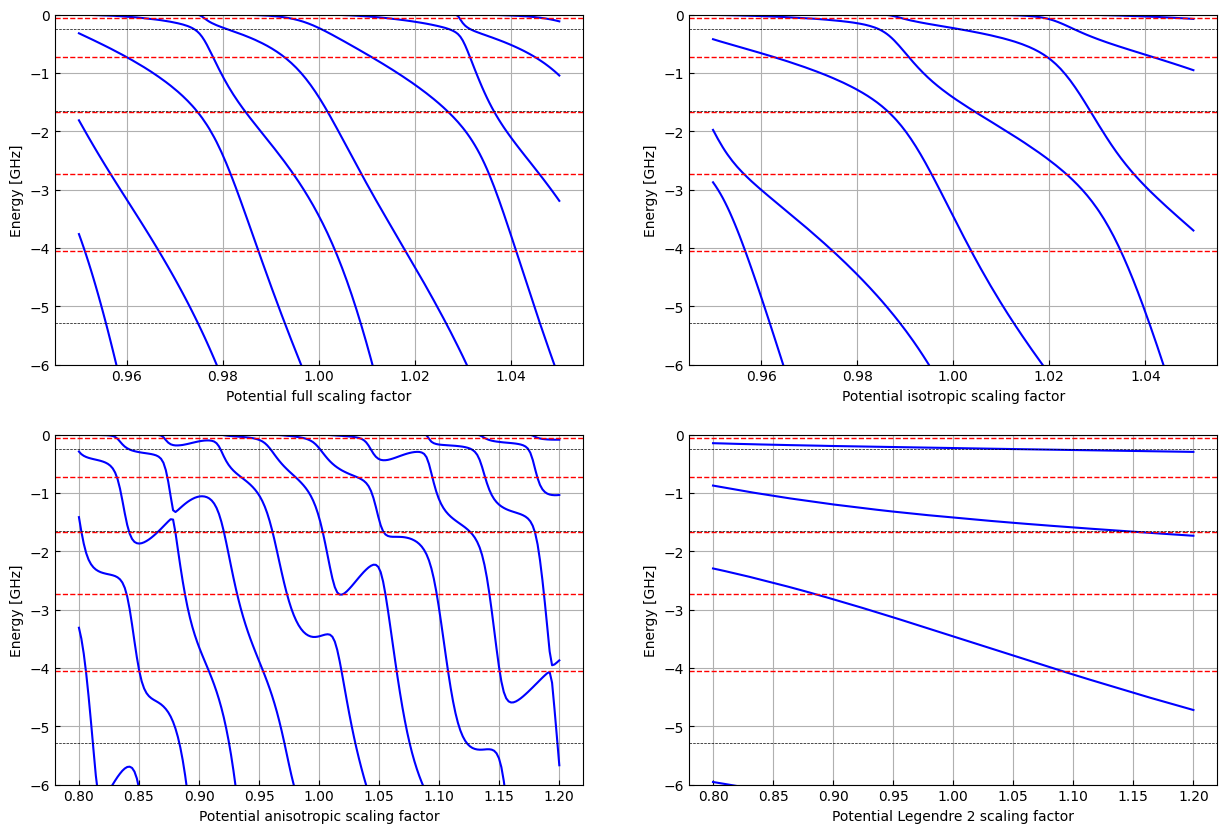

In [31]:
bounds = [
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_full_n_max_1.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_isotropic_n_max_1.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_anisotropic_n_max_1.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_legendre_2_n_max_1.json"),
]

labels = [
    "Potential full scaling factor",
    "Potential isotropic scaling factor",
    "Potential anisotropic scaling factor",
    "Potential Legendre 2 scaling factor"
]

reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, axes = utility.plot_many(2, 2, shape = (15, 10))
for i, ax in enumerate(axes):
    for state in bounds[i].states():
        ax.plot(state[:, 0], state[:, 1], color="blue")
    
    for b in reference:
        ax.axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

    ax.set_ylabel(f"Energy [GHz]")
    ax.set_xlabel(labels[i])
    ax.set_ylim(-6, 0);

### N_max = 0

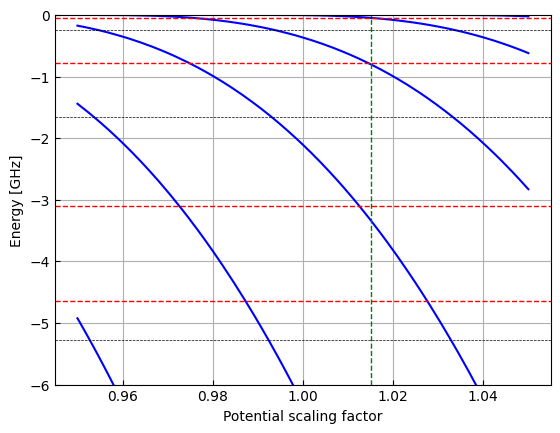

In [ ]:
bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_full_n_max_0.json")

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_triplet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(1.0151, color = "green", linestyle = "--", linewidth = 1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-6, 0);

# fig.savefig(f"{SAVE_PATH}/bounds_triplet_n_0.pdf");

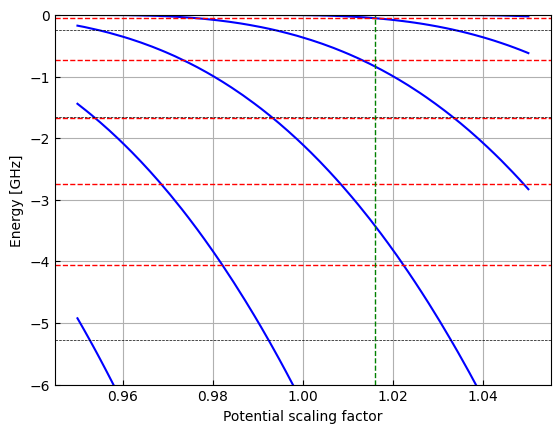

In [43]:
bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_full_n_max_0.json")

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_triplet:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(1.016, color = "green", linestyle = "--", linewidth = 1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-6, 0);

## Singlet

### N_max = 10, potential scaling

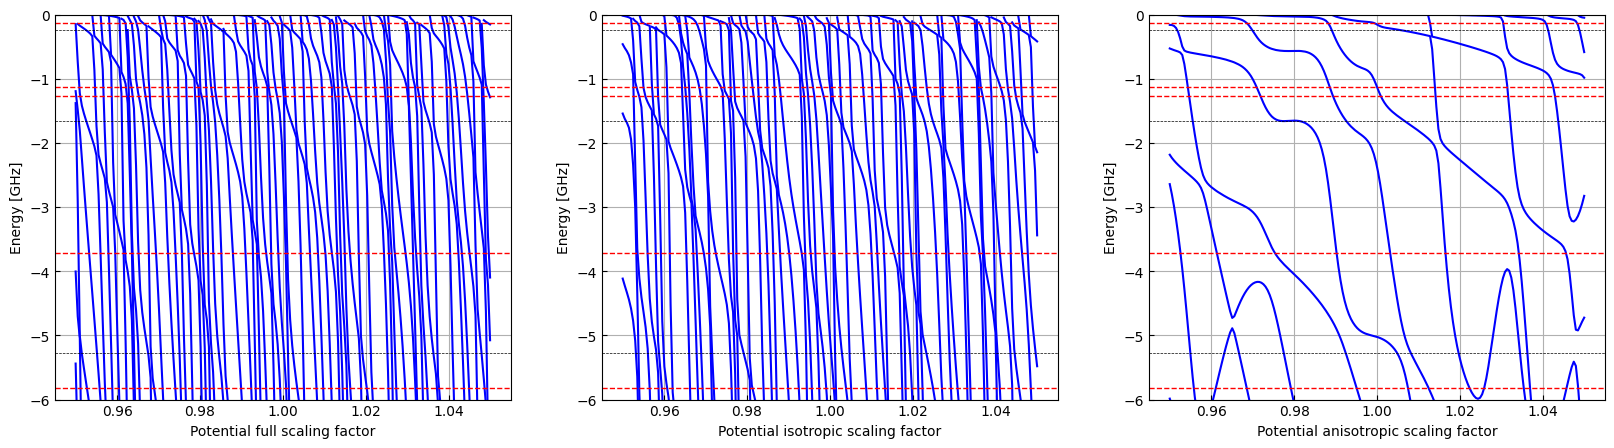

In [8]:
bounds = [
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_full_n_max_10.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_isotropic_n_max_10.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_anisotropic_n_max_10.json"),
]

labels = [
    "Potential full scaling factor",
    "Potential isotropic scaling factor",
    "Potential anisotropic scaling factor",
]

reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, axes = utility.plot_many(1, 3, shape = (20, 5))
for i, ax in enumerate(axes):
    for state in bounds[i].states():
        ax.plot(state[:, 0], state[:, 1], color="blue")
    
    for b in reference:
        ax.axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

    ax.set_ylabel(f"Energy [GHz]")
    ax.set_xlabel(labels[i])
    ax.set_ylim(-6, 0);

### N_max = 2, potential scaling

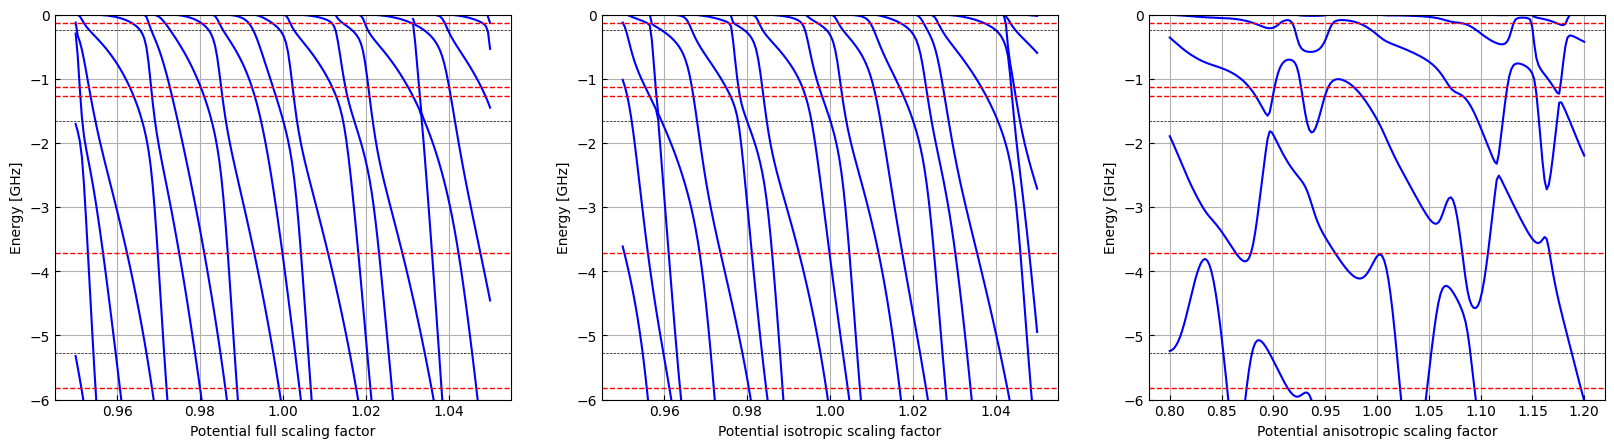

In [4]:
bounds = [
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_full_n_max_2.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_isotropic_n_max_2.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_anisotropic_n_max_2.json"),
]

labels = [
    "Potential full scaling factor",
    "Potential isotropic scaling factor",
    "Potential anisotropic scaling factor",
]

reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, axes = utility.plot_many(1, 3, shape = (20, 5))
for i, ax in enumerate(axes):
    for state in bounds[i].states():
        ax.plot(state[:, 0], state[:, 1], color="blue")
    
    for b in reference:
        ax.axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

    ax.set_ylabel(f"Energy [GHz]")
    ax.set_xlabel(labels[i])
    ax.set_ylim(-6, 0);

### N_max = 1, potential scaling

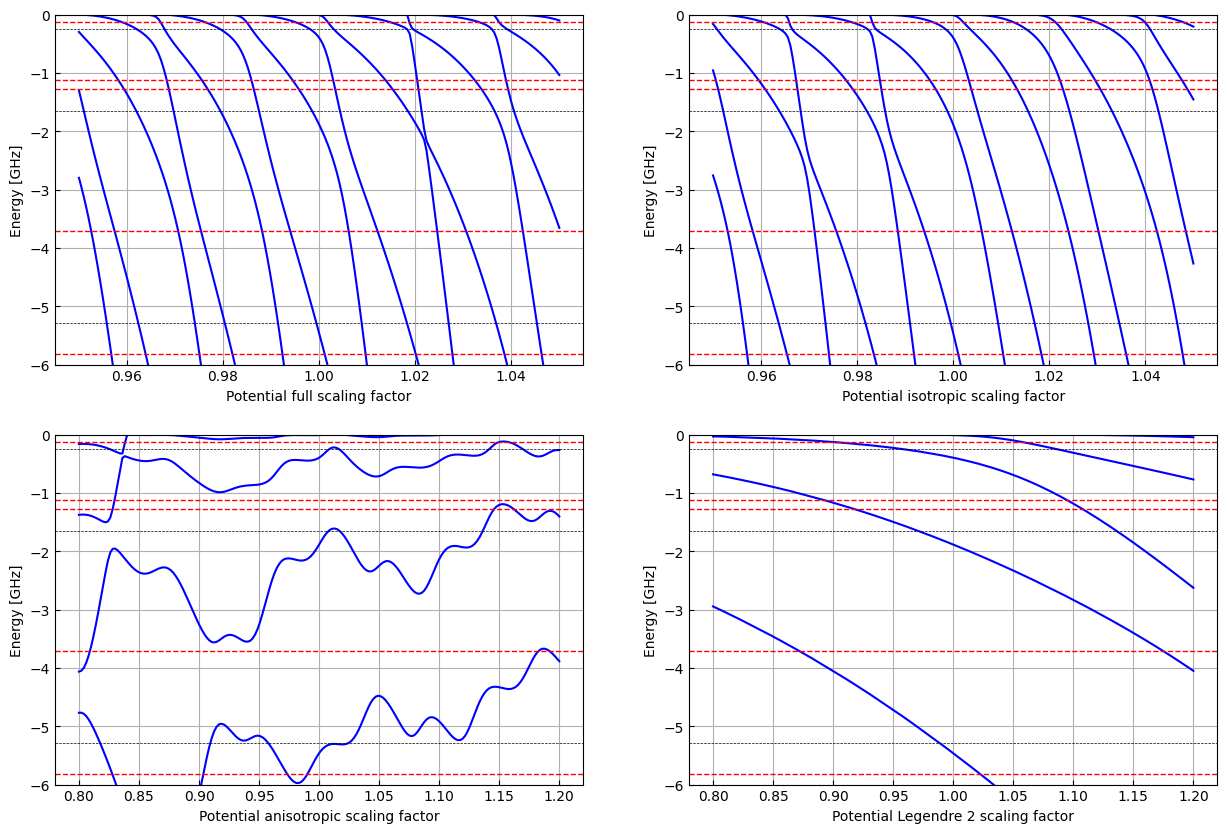

In [30]:
bounds = [
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_full_n_max_1.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_isotropic_n_max_1.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_anisotropic_n_max_1.json"),
	BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_legendre_2_n_max_1.json"),
]

labels = [
    "Potential full scaling factor",
    "Potential isotropic scaling factor",
    "Potential anisotropic scaling factor",
    "Potential Legendre 2 scaling factor"
]

reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, axes = utility.plot_many(2, 2, shape = (15, 10))
for i, ax in enumerate(axes):
    for state in bounds[i].states():
        ax.plot(state[:, 0], state[:, 1], color="blue")
    
    for b in reference:
        ax.axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

    ax.set_ylabel(f"Energy [GHz]")
    ax.set_xlabel(labels[i])
    ax.set_ylim(-6, 0);

### N_max = 0

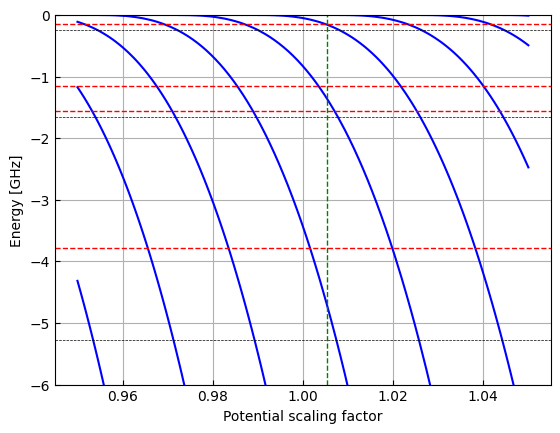

In [85]:
bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_full_n_max_0.json")

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_singlet_scaled_1:
    ax.axhline(b, color = "red", linestyle = "--", linewidth = 1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle= "--", linewidth = 0.5)

ax.axvline(1.0053, color = "green", linestyle = "--", linewidth = 1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-6, 0);

fig.savefig(f"{SAVE_PATH}/bounds_singlet_n_0.pdf", bbox_inches = "tight");

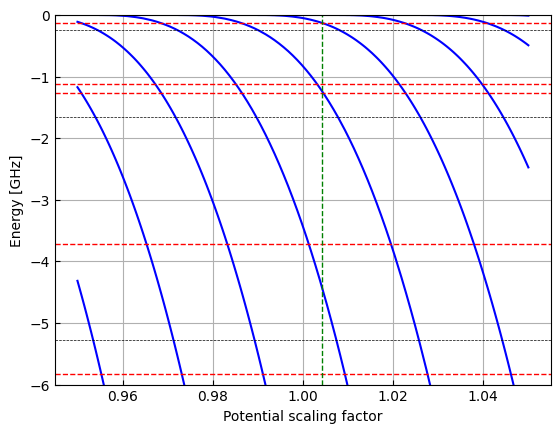

In [54]:
bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_full_n_max_0.json")

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_singlet:
    ax.axhline(b, color = "red", linestyle = "--", linewidth = 1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle= "--", linewidth = 0.5)

ax.axvline(1.0042, color = "green", linestyle = "--", linewidth = 1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-6, 0);

# 2d scalings

### helping functions

In [42]:
from typing import Optional
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"
from ipywidgets import interact

bounds_triplet_2d = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_2d_scaling_isotropic_anisotropic_n_max_10.json")
bounds_singlet_2d = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_2d_scaling_isotropic_anisotropic_n_max_10.json")

In [43]:
from matplotlib.figure import Figure
from py_common.utility import AxesArray

def plot_2d(bound_dependence: BoundsDependence2D, reference: npt.NDArray[np.float64], axis: int = 1) -> tuple[Figure, AxesArray]:
    fig, axes = utility.plot_many(1, 2, shape=(15, 5))

    bounds_init, scaling_view = bound_dependence.slice(0, axis)
    for state in bounds_init.states():
        axes[0].plot(state[:, 0], state[:, 1], color="blue")

    for b in reference:
        axes[0].axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        axes[0].axhline(b, color = "black", linestyle="--", linewidth=0.5)
        
    fig.suptitle(f"scaling view factor {scaling_view:.4f}")

    def update(scaling_index = 0):
        for art in list(axes[0].lines):
            art.remove()

        bounds_index, scaling_view = bound_dependence.slice(scaling_index, axis)

        for state in bounds_index.states():
            axes[0].plot(state[:, 0], state[:, 1], color="blue")

        for b in reference:
            axes[0].axhline(b, color = "red", linestyle="--", linewidth=1)

        for b in BINS:
            axes[0].axhline(b, color = "black", linestyle="--", linewidth=0.5)

        for art in list(axes[1].lines):
            art.remove()
        chi2 = bounds_losses(bounds_index, reference)
        axes[1].plot(chi2[0, :], chi2[1, :], color = "blue")

        fig.suptitle(f"scaling view factor {scaling_view:.4f}")

        fig.canvas.draw_idle()

    interact(update, scaling_index = (0, bound_dependence.slice_len(axis) - 1))

    return fig, axes

### 2d grid optimization

interactive(children=(IntSlider(value=0, description='scaling_index', max=99), Output()), _dom_classes=('widge…

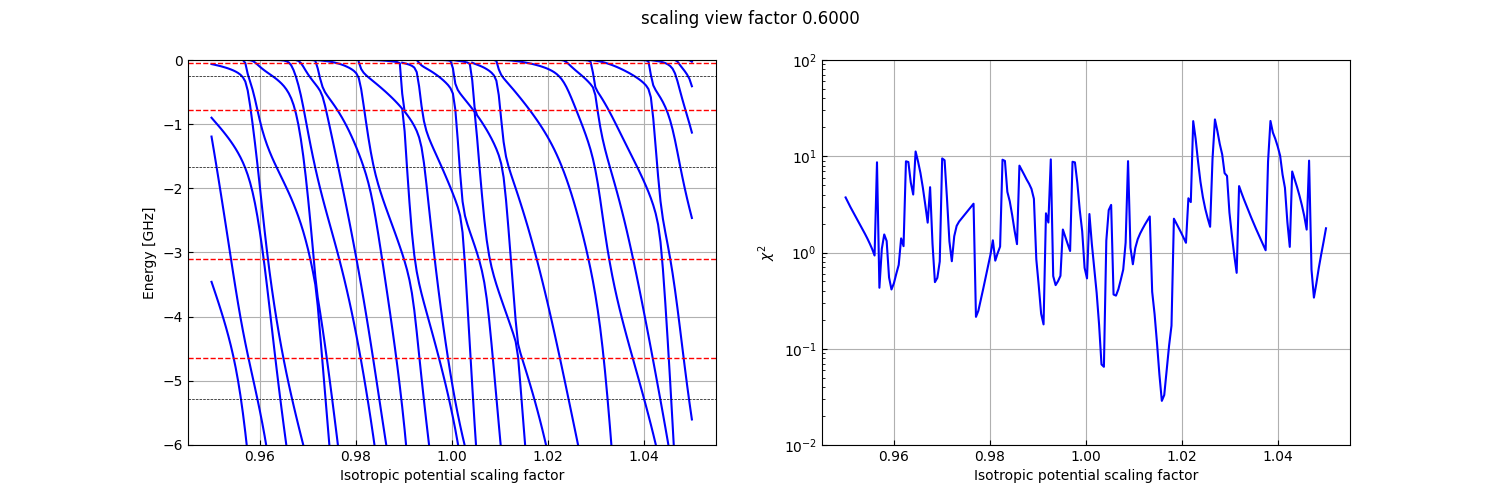

In [44]:
# triplet n = 10 2d scaling
%matplotlib widget

fig, axes = plot_2d(bounds_triplet_2d, reference_triplet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-2, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

interactive(children=(IntSlider(value=0, description='scaling_index', max=99), Output()), _dom_classes=('widge…

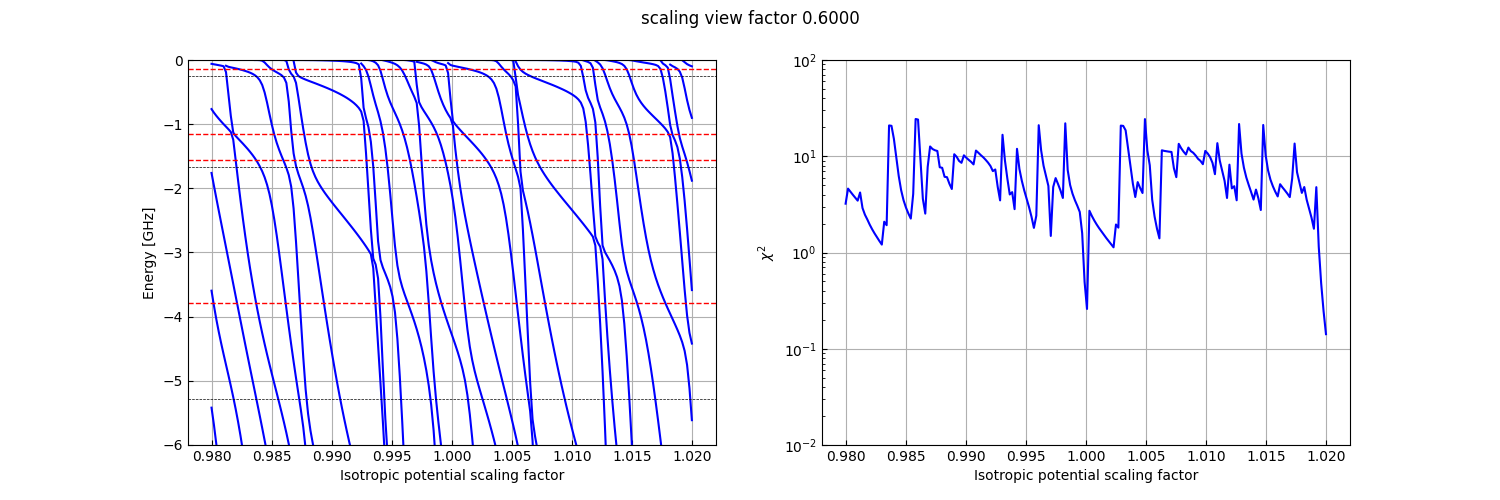

In [122]:
# singlet n = 10 2d scaling
%matplotlib widget

fig, axes = plot_2d(bounds_singlet_2d, reference_singlet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-2, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

### triplet zoom on anisotropic scaling 0.8141 

interactive(children=(IntSlider(value=0, description='scaling_index', max=49), Output()), _dom_classes=('widge…

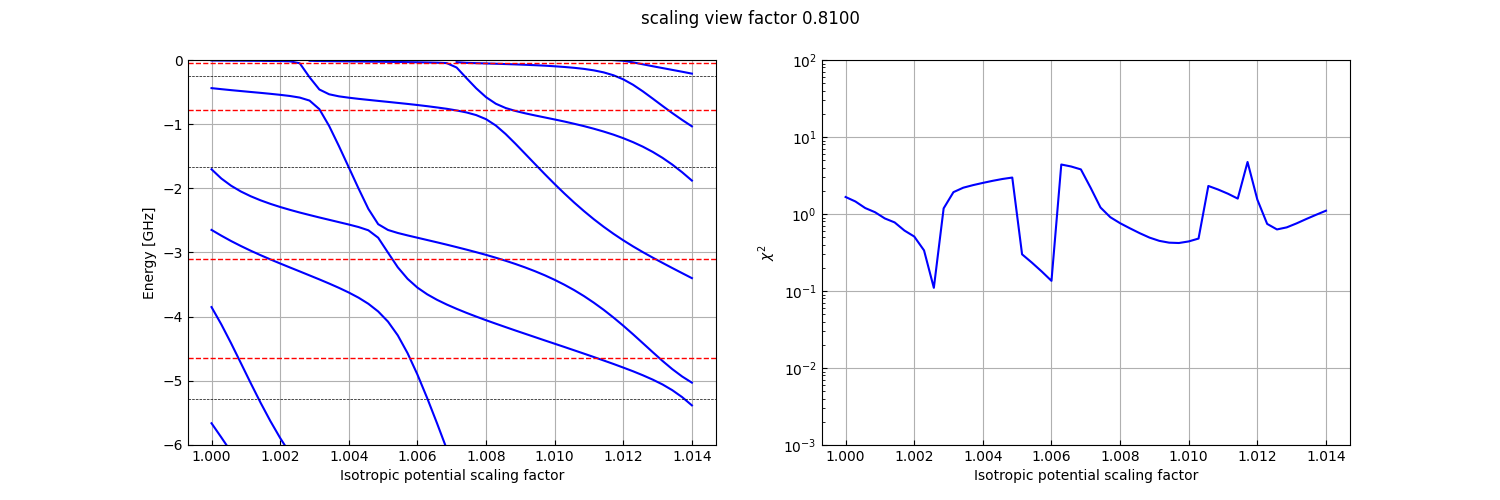

In [78]:
# triplet n = 10 2d scaling zoomed 0.8141
%matplotlib widget

bounds_triplet_2d_zoomed = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_2d_scaling_isotropic_anisotropic_n_max_10_zoomed_0.8141.json")

fig, axes = plot_2d(bounds_triplet_2d_zoomed, reference_triplet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-3, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

anisotropic scaling 0.8142857142857143
isotropic scaling 1.0071


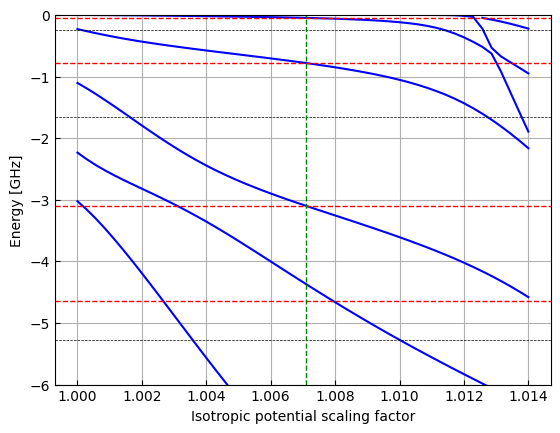

In [82]:
%matplotlib inline

bounds, scaling_aniso = bounds_triplet_2d_zoomed.slice(21)
scaling_iso = 1.0071
print("anisotropic scaling", scaling_aniso)
print("isotropic scaling", scaling_iso)

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_triplet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(scaling_iso, color = "green", linestyle="--", linewidth=1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling factor")
ax.set_ylim(-6, 0);

# fig.savefig(f"{SAVE_PATH}/bounds_triplet_n_10_scaled_0,81.pdf", bbox_inches = "tight")

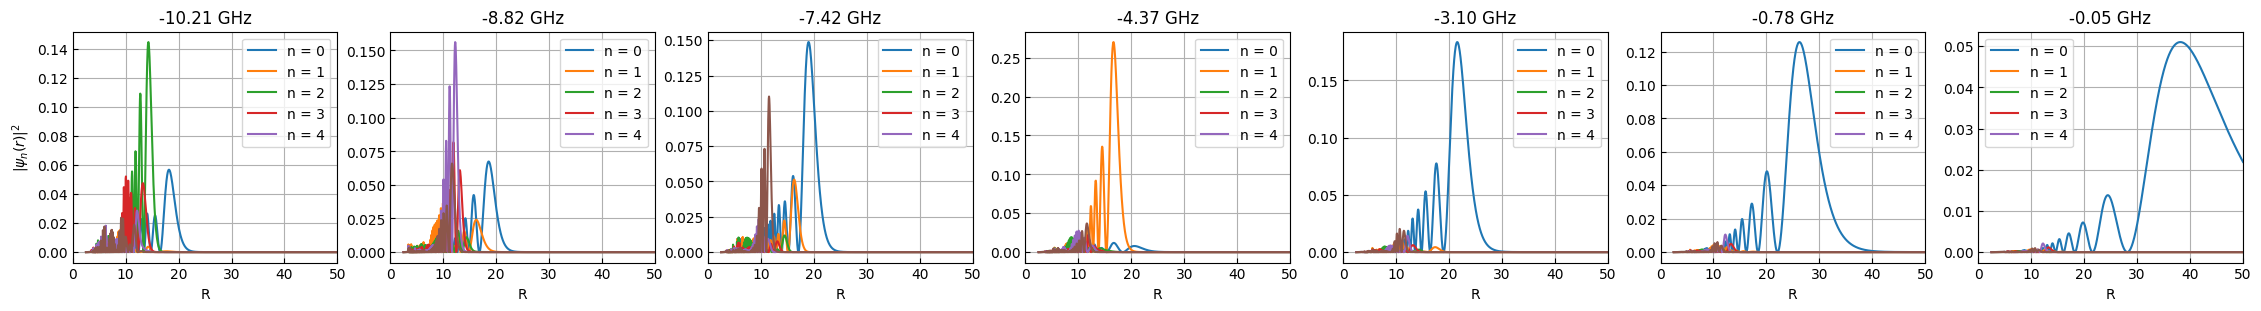

In [69]:
wave_function_triplet_scaled = parse_wavefunction_file(f"{DATA_PATH}/wave_function_triplet_n_10_scaled_0.8141.output", 11, max_coeff=5)

fig, axes = utility.plot_many(1, len(wave_function_triplet_scaled), shape = (4 * len(wave_function_triplet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")
for i, (state, parsed) in enumerate(wave_function_triplet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(max_coeff)])

fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_10_scaled_0,81.pdf", bbox_inches = "tight")

### triplet zoom on anisotropic scaling 0.6040

interactive(children=(IntSlider(value=0, description='scaling_index', max=49), Output()), _dom_classes=('widge…

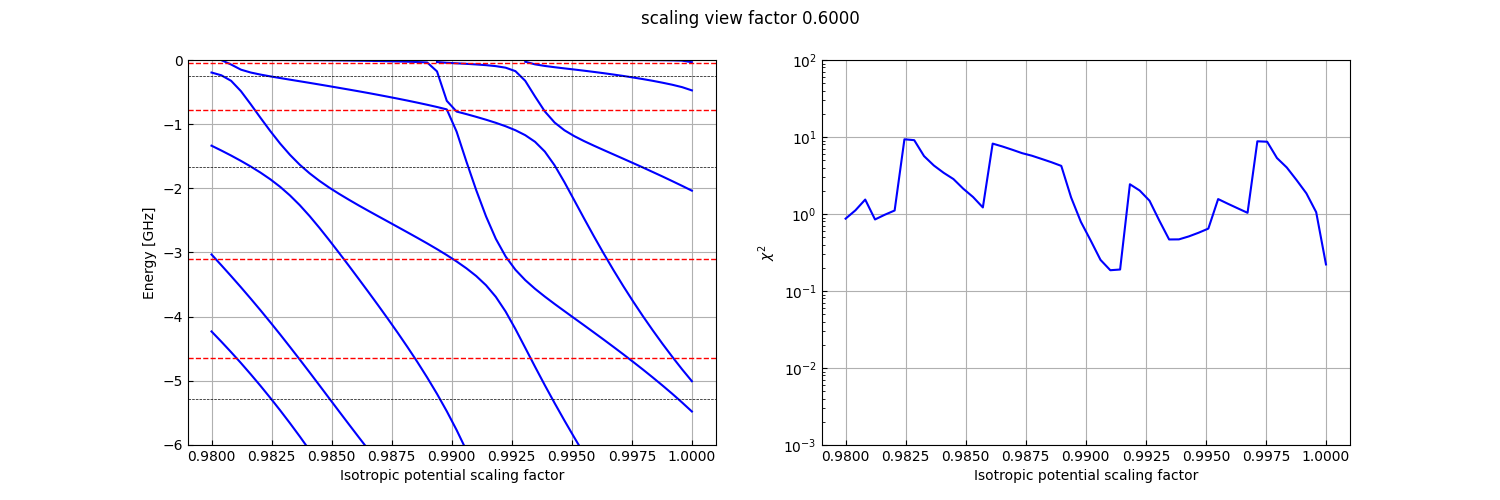

In [70]:
# triplet n = 10 2d scaling zoomed 0.6040
%matplotlib widget

bounds_triplet_2d_zoomed = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_2d_scaling_isotropic_anisotropic_n_max_10_zoomed_0.6040.json")

fig, axes = plot_2d(bounds_triplet_2d_zoomed, reference_triplet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-3, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

anisotropic scaling 0.6040816326530613
isotropic scaling 0.99125


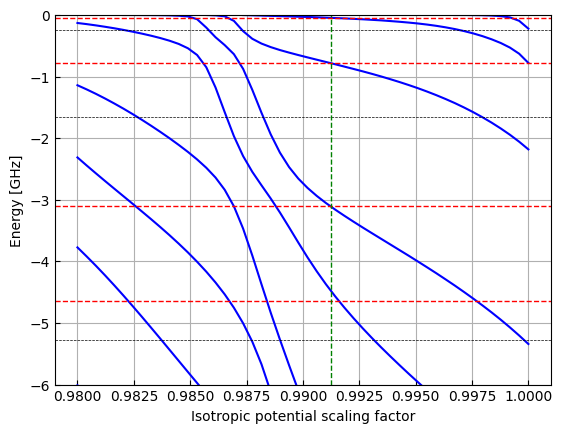

In [77]:
%matplotlib inline

bounds, scaling_aniso = bounds_triplet_2d_zoomed.slice(20)
scaling_iso = 0.99125
print("anisotropic scaling", scaling_aniso)
print("isotropic scaling", scaling_iso)

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_triplet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(scaling_iso, color = "green", linestyle="--", linewidth=1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling factor")
ax.set_ylim(-6, 0);

fig.savefig(f"{SAVE_PATH}/bounds_triplet_n_10_scaled_0,60.pdf", bbox_inches = "tight")

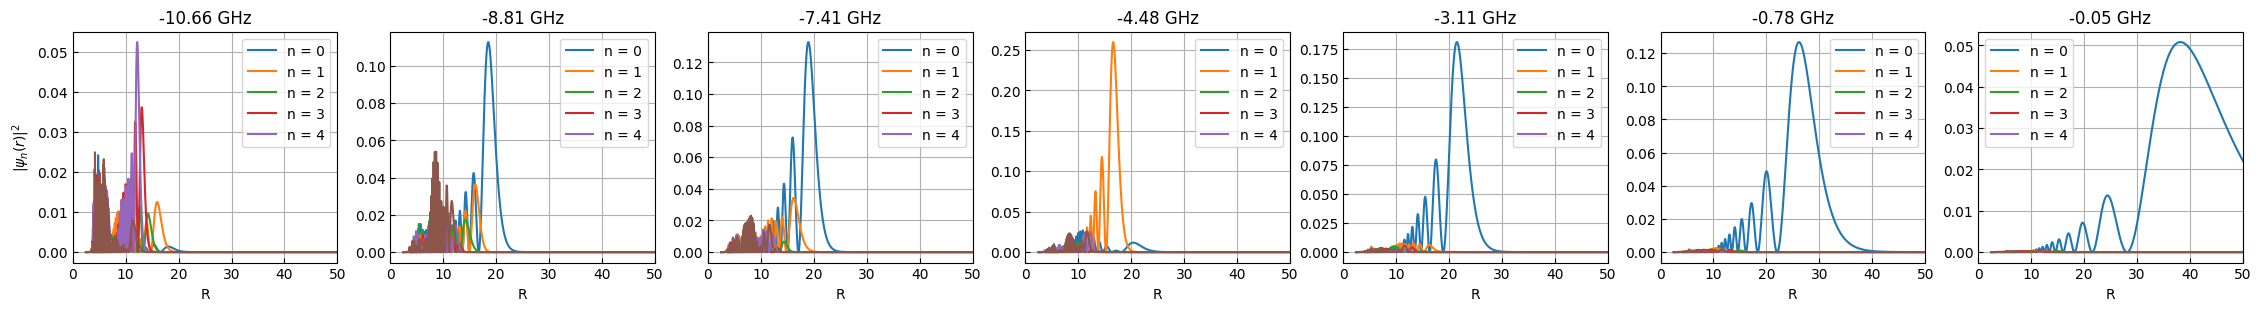

In [ ]:
wave_function_triplet_scaled = parse_wavefunction_file(f"{DATA_PATH}/wave_function_triplet_n_10_scaled_0.6040.output", 11, max_coeff=5)

fig, axes = utility.plot_many(1, len(wave_function_triplet_scaled), shape = (4 * len(wave_function_triplet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")
for i, (state, parsed) in enumerate(wave_function_triplet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(max_coeff)])
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_10_scaled_0,60.pdf", bbox_inches="tight")

### singlet zoom on anisotropic scaling

interactive(children=(IntSlider(value=0, description='scaling_index', max=49), Output()), _dom_classes=('widge…

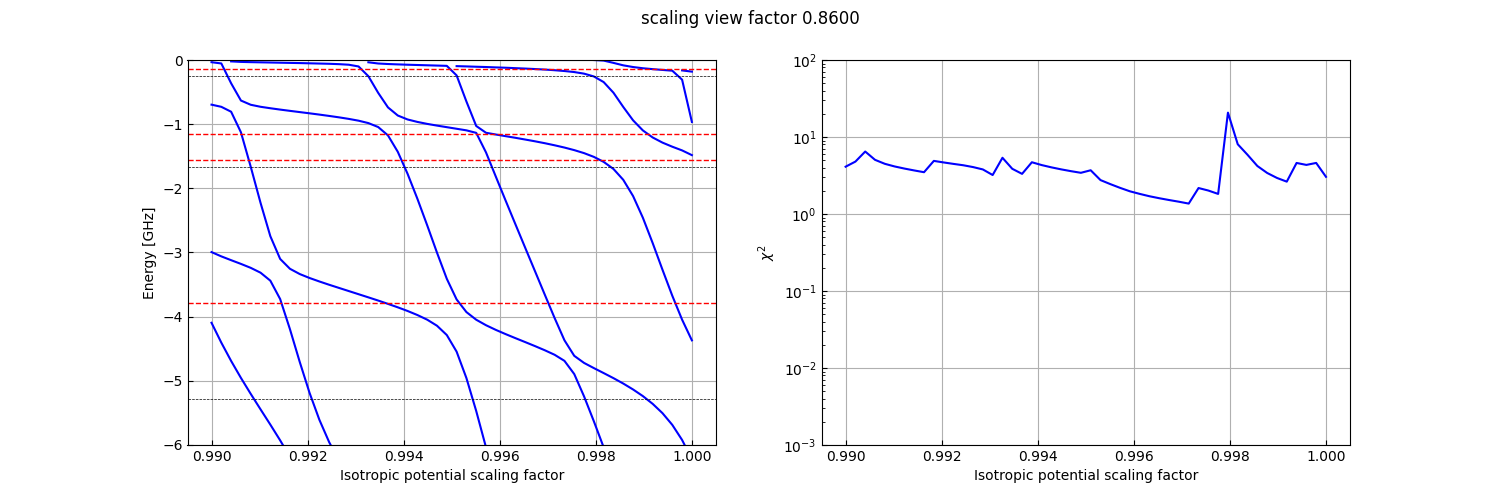

In [94]:
# triplet n = 10 2d scaling zoomed 0.8667
%matplotlib widget

bounds_singlet_2d_zoomed = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_2d_scaling_isotropic_anisotropic_n_max_10_zoomed_0,8667.json")
fig, axes = plot_2d(bounds_singlet_2d_zoomed, reference_singlet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-3, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

anisotropic scaling 0.8604081632653061
isotropic scaling 0.9958


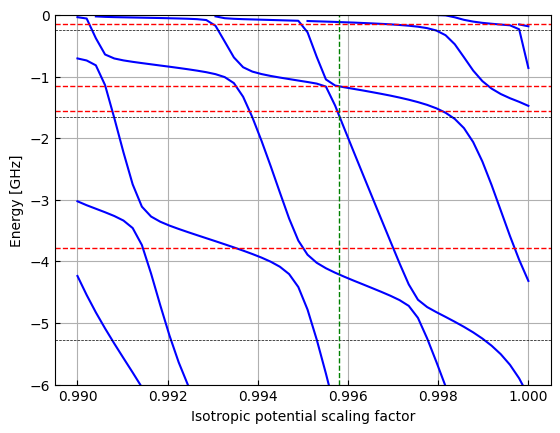

In [ ]:
%matplotlib inline

bounds, scaling_aniso = bounds_singlet_2d_zoomed.slice(1)
scaling_iso = 0.9958
print("anisotropic scaling", scaling_aniso)
print("isotropic scaling", scaling_iso)

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_singlet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(scaling_iso, color = "green", linestyle="--", linewidth=1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling factor")
ax.set_ylim(-6, 0);

# fig.savefig(f"{SAVE_PATH}/bounds_singlet_n_10_scaled_0,86.pdf")

### Anomalies

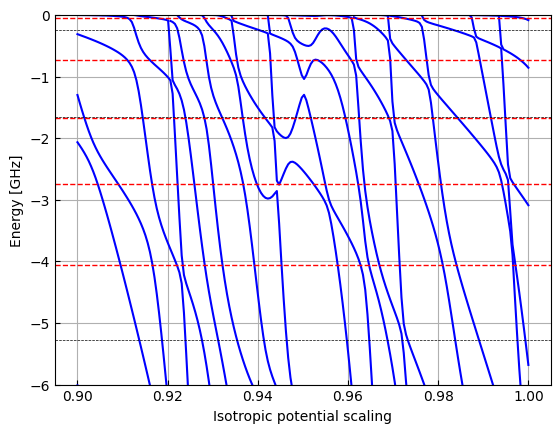

In [26]:
bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_scaling_isotropic_n_max_10_ext.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling")
ax.set_ylim(-6, 0);

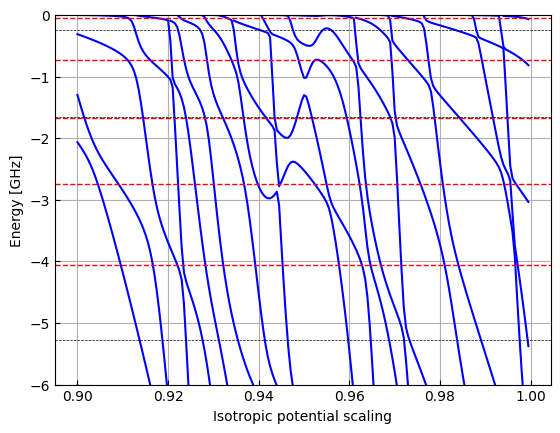

In [27]:
bounds = BoundsDependence(f"{DATA_PATH}/bound_triplet_n_10_scaling_large.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling")
ax.set_ylim(-6, 0);

# Reconstructions

## Scaled

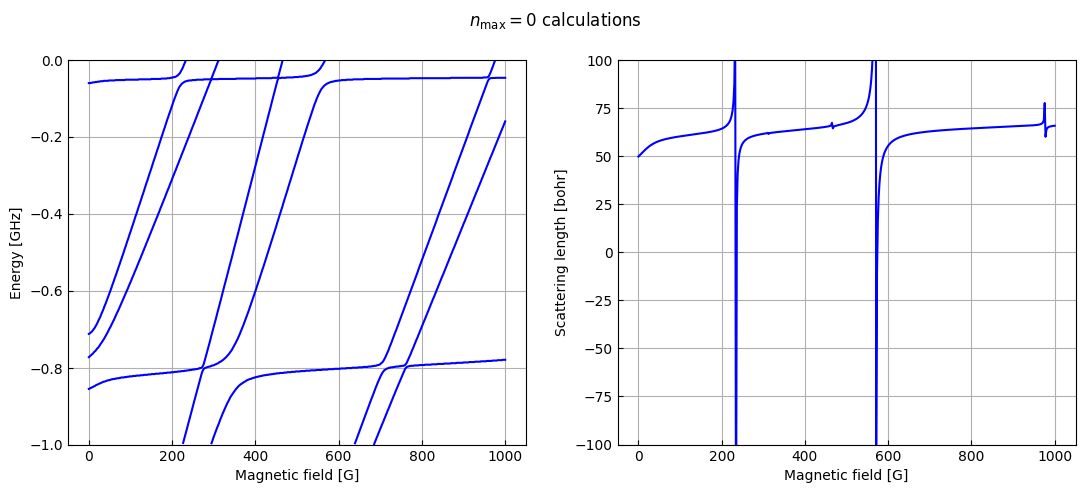

In [ ]:
fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_0_scaled.json")
for state in bounds.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

scatterings = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scattering_n_max_0_scaled.json")

axes[1].plot(scatterings.parameters, scatterings.s_lengths().real, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_0_scaled.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 0$ calculations");

## Unscaled

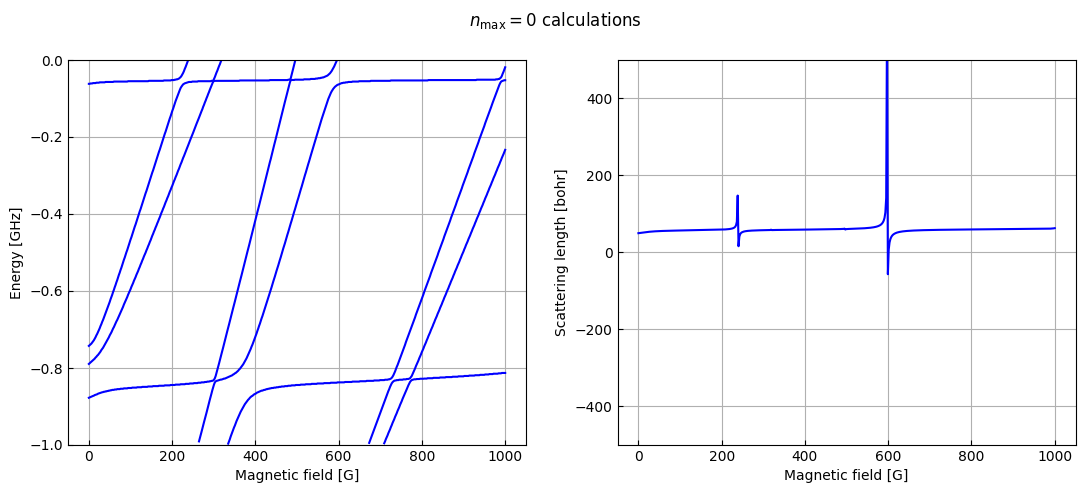

In [6]:
fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_0_unscaled.json")
for state in bounds.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

scatterings = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scattering_n_max_0_unscaled.json")

axes[1].plot(scatterings.parameters, scatterings.s_lengths().real, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-500, 500);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_0.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 0$ calculations");

# Experimenting

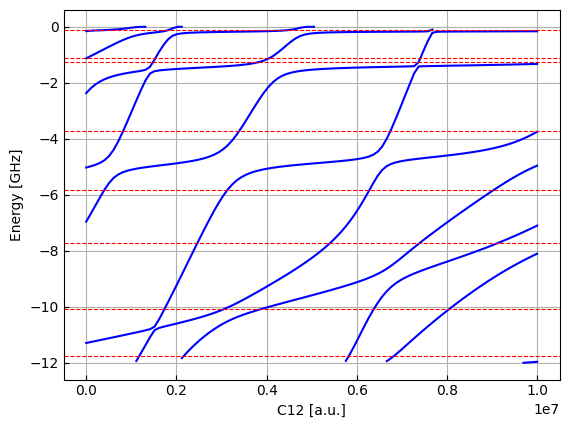

In [16]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_singlet_bound_states_n_max_10_shift_0.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("C12 [a.u.]");

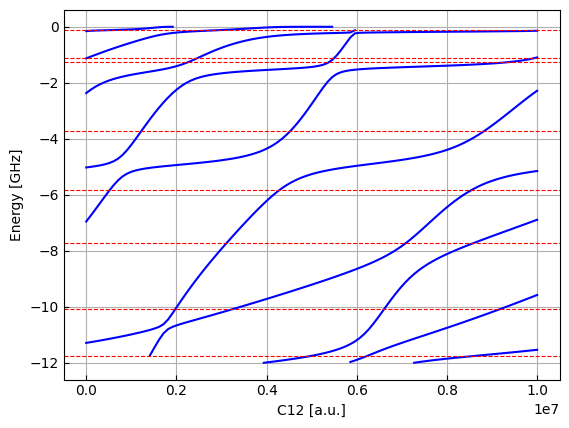

In [ ]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_singlet_bound_states_n_max_10_shift_1.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("C12 [a.u.]");

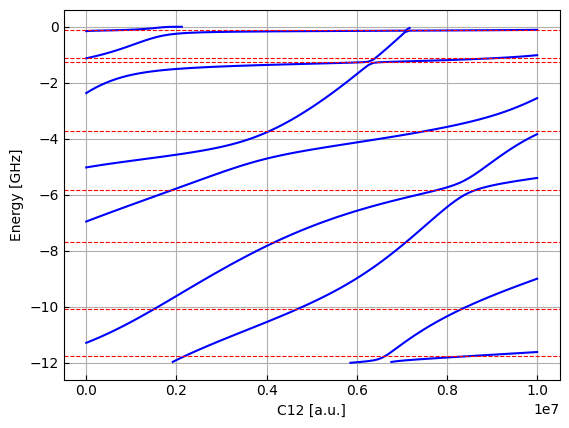

In [3]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_singlet_bound_states_n_max_10_shift_2.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("C12 [a.u.]");

# Old

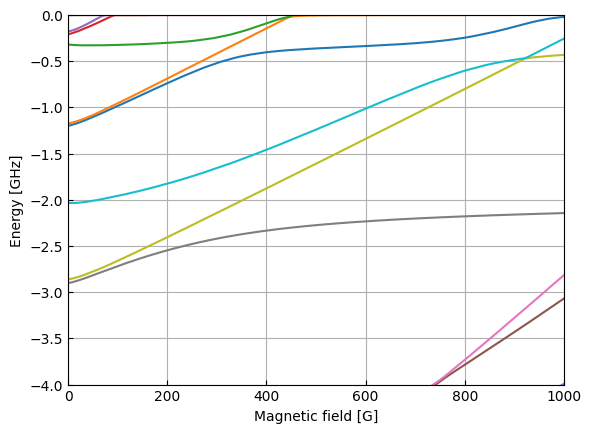

In [2]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_0_n_tot_max_0.json")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1])
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-4, 0);

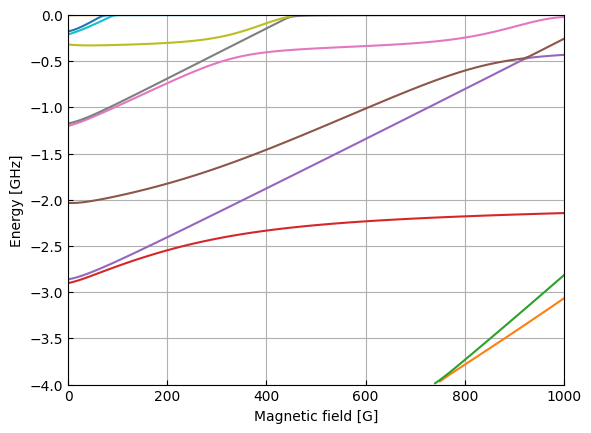

In [3]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_2.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1])
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-4, 0);

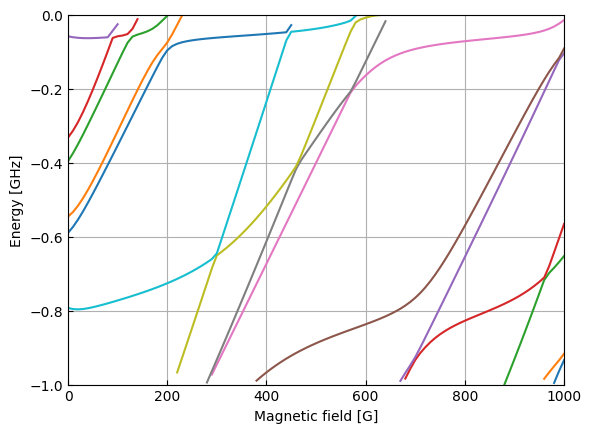

In [4]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_n_10.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1])
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-1, 0);